
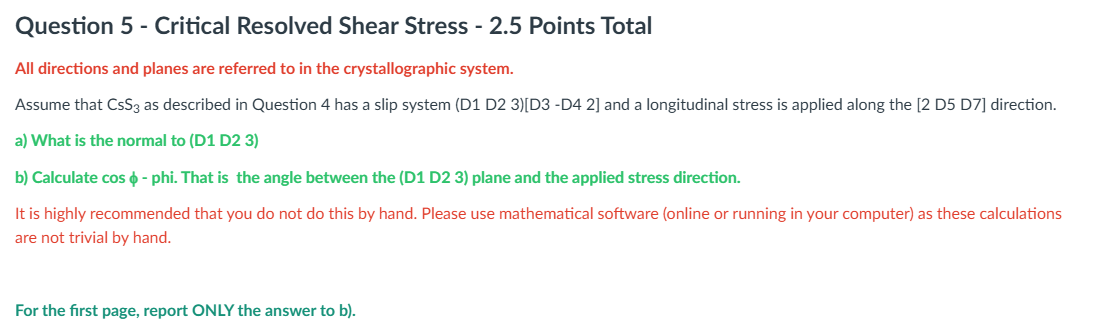

In [28]:
import numpy as np

In [29]:
plane = np.array([2,1,3])
slipd = np.array([9,-2,2])
stressd = np.array([2,2,2])

## Find Normal to the (213) plane


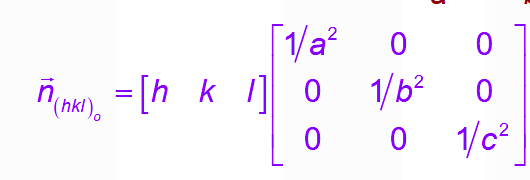

But replace the orthorhombic G* with triclinic G* to find the normal to (213)

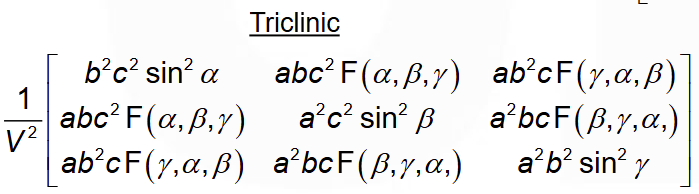

In [30]:
#Get the normal using reciprocal metrix tensor
#Normal to (213) in CsS3 from Q4

a = 4.75
b = 9.32
c = 11.65
alpha = np.radians(95.07)
beta = np.radians(95.31)
gamma = np.radians(89.6)

#CsS3 is triclinic
V = a*b*c*np.sqrt(1-np.cos(alpha)**2-np.cos(beta)**2-np.cos(gamma)**2+2*np.cos(alpha)*np.cos(beta)*np.cos(gamma))

#Using reciprocal matrix tensor
Gprime = 1/(V**2) * np.array([[b**2*c**2*np.sin(alpha)**2, a*b*c**2*(np.cos(alpha)*np.cos(beta)-np.cos(gamma)), a*b**2*c*(np.cos(gamma)*np.cos(alpha)-np.cos(beta))],
                         [a*b*c**2*(np.cos(alpha)*np.cos(beta)-np.cos(gamma)), a**2*c**2*np.sin(beta)**2, a**2*b*c*(np.cos(beta)*np.cos(gamma)-np.cos(alpha))],
                         [a*b**2*c*(np.cos(gamma)*np.cos(alpha)-np.cos(beta)), a**2*b*c*(np.cos(beta)*np.cos(gamma)-np.cos(alpha)), a**2*b**2*np.sin(gamma)**2]])


Aprime = np.dot(plane, Gprime)


print('normal to (213) is:', Aprime)


normal to (213) is: [0.09450228 0.01412214 0.02666816]


In [31]:
#Solving for cosphi and phi


#CsS3 is triclinic

#Solve for cosphi
Gmatrix = np.array([[a**2, a*b*np.cos(gamma), a*c*np.cos(beta)], 
                    [b*a*np.cos(gamma), b**2, b*c*np.cos(alpha)], 
                    [c*a*np.cos(beta), c*b*np.cos(alpha), c**2]])


num = np.dot(np.dot(stressd, Gmatrix), Aprime.T)
cosphi = num/(np.sqrt(np.dot(np.dot(stressd, Gmatrix), stressd.T)) * np.sqrt(np.dot(np.dot(Aprime, Gmatrix), Aprime.T)))




print('cosphi: \n', cosphi, '\n')

phi = np.arccos(cosphi)
phi_degrees = np.degrees(phi)
print('phi (degrees): \n', phi_degrees)


#Lambda is the same formula, but replace Aprime with slipd

cosphi: 
 0.7666489007141756 

phi (degrees): 
 39.94609058762518
